In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data = pd.read_csv('Iris.csv')
data.head()
del data['Id']
print(data['Species'].unique())
data.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop(data[data['Species'] == 'Iris-setosa'].index)
data = data.set_index(np.arange(len(data)))
Y = data['Species'].to_numpy()
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()

In [4]:
for i in range(len(Y)):
    if Y[i] == 'Iris-versicolor':
        Y[i] = 0
    else:
        Y[i] = 1

In [5]:
Y = Y.astype("float")
X = X.astype("float")

In [93]:
class LR:
    def __init__(self):
        self.t = np.array([1.0, 1.0, 1.0, 1.0])
        self.b = 1
        self.success = False
        self.coef_ = [1.0, 1.0, 1.0, 1.0, 1.0]
    def H(self, x):
        return 1 / (1 + np.exp(-np.dot(x, self.t) - self.b))
    def N1(self, x, t0, b):
        return 1 / (1 + np.exp(-np.dot(x, t0 + b * (self.t - t0)) - self.b))
    def N2(self, x, b0, b):
        return 1 / (1 + np.exp(-np.dot(x, self.t) - (b0 + b * (self.b - b0))))
    def LosF(self, x, y):
        total = 0
        for i in range(len(x)):
            total += y[i] * np.log(self.H(x[i])) + (1 - y[i]) * np.log(self.H(x[i]))
        return -total / len(x)
    def __Derivative1(self, x, y):
        total1 = 1
        total0 = 1
        for i in range(len(x)):
            total1 += (self.H(x[i]) - y[i]) * x[i]
            total0 += (self.H(x[i]) - y[i])
        ans = [total0 / len(x), total1 / len(x)]
        return ans
    def __Derivative2(self, x, y, t0, b0, b):
        total1 = 1
        total0 = 1
        for i in range(len(x)):
            total1 += (self.N1(x[i], t0, b) - y[i]) * x[i]
            total0 += (self.N2(x[i], b0, b) - y[i])
        ans = [total0 / len(x), total1 / len(x)]
        return ans
    def fittg(self, x, y, choise = False):
        los = []
        for _ in range(2000):
            self.t -= 0.1 * self.__Derivative1(x, y)[1]
            self.b -= 0.1 * self.__Derivative1(x, y)[0]
            if choise:
                los.append(self.LosF(x, y))
        if choise:
            plt.plot(range(2000), los)
        self.coef_ = np.insert(self.t, 0, self.b)
        self.success = True
    def fittn(self, x, y, choise = False, b = 0.5):
        los = []
        t0 = 0.5
        b0 = 0.5
        for _ in range(2000):
            t1 = self.t
            b1 = self.b
            self.t = self.t - 0.1 * self.__Derivative2(x, y, t0, b0, b)[1] + b * (self.t - t0)
            self.b = self.b - 0.1 * self.__Derivative2(x, y, t0, b0, b)[0] + b * (self.b - b0)
            t0 = t1
            b0 = b1
            if choise:
                los.append(self.LosF(x, y))
        if choise:
            plt.plot(range(2000), los)
        self.coef_ = np.insert(self.t, 0, self.b)
        self.success = True
    def predict(self, x):
        ch = self.H(x)
        for i in range(len(x)):
            if ch[i] < 0.5:
                ch[i] = 0
            else:
                ch[i] = 1
        return ch
    def score(self, yt, y):
        positive = 0
        for i in range(len(yt)):
            if yt[i] == y[i]:
                positive += 1
        return positive / len(yt)

[-2.61508546 -3.07204747  4.40632733  3.95793327]
0.98


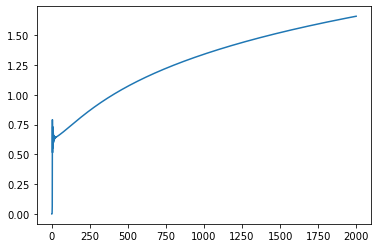

In [94]:
model0 = LR()
model0.fittg(X, Y, True)
pr = model0.predict(X)
print(model0.t)
model0.LosF(X, Y)
print(model0.score(pr, Y))

In [95]:
model0.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

[-2.85702367 -3.94867703  5.39858605  4.76321325]
0.98


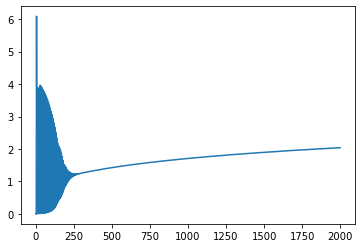

In [96]:
model1 = LR()
model1.fittn(X, Y, True)
pr = model1.predict(X)
print(model1.t)
model1.LosF(X, Y)
print(model1.score(pr, Y))

In [97]:
model1.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])